In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Carga 

In [3]:
X_lr = pd.read_json('processed_for_logistic_regression.json')
X_dt = pd.read_json('processed_for_random_forest.json')
y = pd.read_json('target_variable.json')

# Separación

In [4]:
X_train_lr, X_test_lr, y_train, y_test = train_test_split(
    X_lr, y, test_size=0.2, stratify=y, random_state=12341234)

X_train_dt, X_test_dt, _, _ = train_test_split(
    X_dt, y, test_size=0.2, stratify=y, random_state=12341234)

# Regresión logística

In [5]:


param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 2, 5, 8, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_lr, y_train)

best_logreg = grid.best_estimator_


y_prob = best_logreg.predict_proba(X_test_lr)[:, 1]

thresholds = np.arange(0.3,0.9, 0.05)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

y_pred = (y_prob >= best_thresh).astype(int)

print("🔍 Optimized Logistic Regression for F1-score")
print("Best Parameters:", grid.best_params_)
print("Best Threshold:", best_thresh)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

/home/juan/U/mle/Lab1MLE/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/U/mle/Lab1MLE/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/U/mle/Lab1MLE/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/U/mle/Lab1MLE/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when 

🔍 Optimized Logistic Regression for F1-score
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Threshold: 0.7
[[6241  758]
 [ 454 1546]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6999
           1       0.67      0.77      0.72      2000

    accuracy                           0.87      8999
   macro avg       0.80      0.83      0.81      8999
weighted avg       0.87      0.87      0.87      8999

AUC: 0.9363792684669238


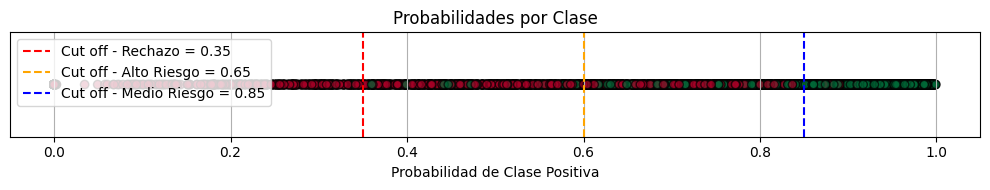

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
plt.scatter(y_prob, [0]*len(y_prob), c=y_test, cmap='RdYlGn', edgecolor='k', alpha=0.7)


plt.axvline(x=0.35, color='red', linestyle='--', label=f'Cut off - Rechazo = 0.35')
plt.axvline(x=0.60, color='orange', linestyle='--', label=f'Cut off - Alto Riesgo = 0.65')
plt.axvline(x=0.85, color='blue', linestyle='--', label=f'Cut off - Medio Riesgo = 0.85')


plt.title("Probabilidades por Clase")
plt.xlabel("Probabilidad de Clase Positiva")
plt.yticks([])  
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#count the number of instances below 0.35
below_035 = np.sum(y_prob < 0.35)
print(f"Number of instances below 0.35: {below_035}")
#count the number of instances between 0.35 and 0.60
between_035_060 = np.sum((y_prob >= 0.35) & (y_prob < 0.60))
print(f"Number of instances between 0.35 and 0.60: {between_035_060}")
#count the number of instances between 0.60 and 0.85
between_060_085 = np.sum((y_prob >= 0.60) & (y_prob < 0.85))
print(f"Number of instances between 0.60 and 0.85: {between_060_085}")
#count the number of instances above 0.85
above_085 = np.sum(y_prob >= 0.85)
print(f"Number of instances above 0.85: {above_085}")

#percentage of instances below 0.35
percentage_below_035 = (below_035 / len(y_prob)) * 100
print(f"Percentage of instances below 0.35: {percentage_below_035:.2f}%")
#percentage of instances between 0.35 and 0.60
percentage_between_035_060 = (between_035_060 / len(y_prob)) * 100
print(f"Percentage of instances between 0.35 and 0.60: {percentage_between_035_060:.2f}%")
#percentage of instances between 0.60 and 0.85
percentage_between_060_085 = (between_060_085 / len(y_prob)) * 100
print(f"Percentage of instances between 0.60 and 0.85: {percentage_between_060_085:.2f}%")
#percentage of instances above 0.85
percentage_above_085 = (above_085 / len(y_prob)) * 100
print(f"Percentage of instances above 0.85: {percentage_above_085:.2f}%")   

Number of instances below 0.35: 5033
Number of instances between 0.35 and 0.60: 1095
Number of instances between 0.60 and 0.85: 1531
Number of instances above 0.85: 1340
Percentage of instances below 0.35: 55.93%
Percentage of instances between 0.35 and 0.60: 12.17%
Percentage of instances between 0.60 and 0.85: 17.01%
Percentage of instances above 0.85: 14.89%


In [7]:
feature_names = X_train_lr.columns

coefficients = best_logreg.coef_[0]  

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])


coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

In [8]:
coef_df

,Feature,Coefficient,Abs_Coefficient
7,previous_loan_defaults_on_file,-5.772501,5.772501
4,loan_percent_income,1.154292,1.154292
3,loan_amnt,-0.441589,0.441589
6,credit_score,-0.440489,0.440489
11,person_home_ownership_OWN,-0.414280,0.414280
13,loan_intent_DEBTCONSOLIDATION,0.269113,0.269113
10,person_home_ownership_MORTGAGE,-0.211788,0.211788
16,loan_intent_MEDICAL,0.202298,0.202298
12,person_home_ownership_RENT,0.188643,0.188643
15,loan_intent_HOMEIMPROVEMENT,0.172877,0.172877


# Árbol de decisión

In [9]:
param_grid = {
    'max_depth': [3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}


grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=12341234),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_tree.fit(X_train_dt, y_train)

best_tree = grid_tree.best_estimator_

y_pred_dt_opt = best_tree.predict(X_test_dt)
y_prob_dt_opt = best_tree.predict_proba(X_test_dt)[:, 1]

print("Decision Tree")
print("Best Parameters:", grid_tree.best_params_)
print(confusion_matrix(y_test, y_pred_dt_opt))
print(classification_report(y_test, y_pred_dt_opt))
print("AUC:", roc_auc_score(y_test, y_prob_dt_opt))

Decision Tree
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
[[4707 2292]
 [   6 1994]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      6999
           1       0.47      1.00      0.63      2000

    accuracy                           0.74      8999
   macro avg       0.73      0.83      0.72      8999
weighted avg       0.88      0.74      0.77      8999

AUC: 0.9219334904986426


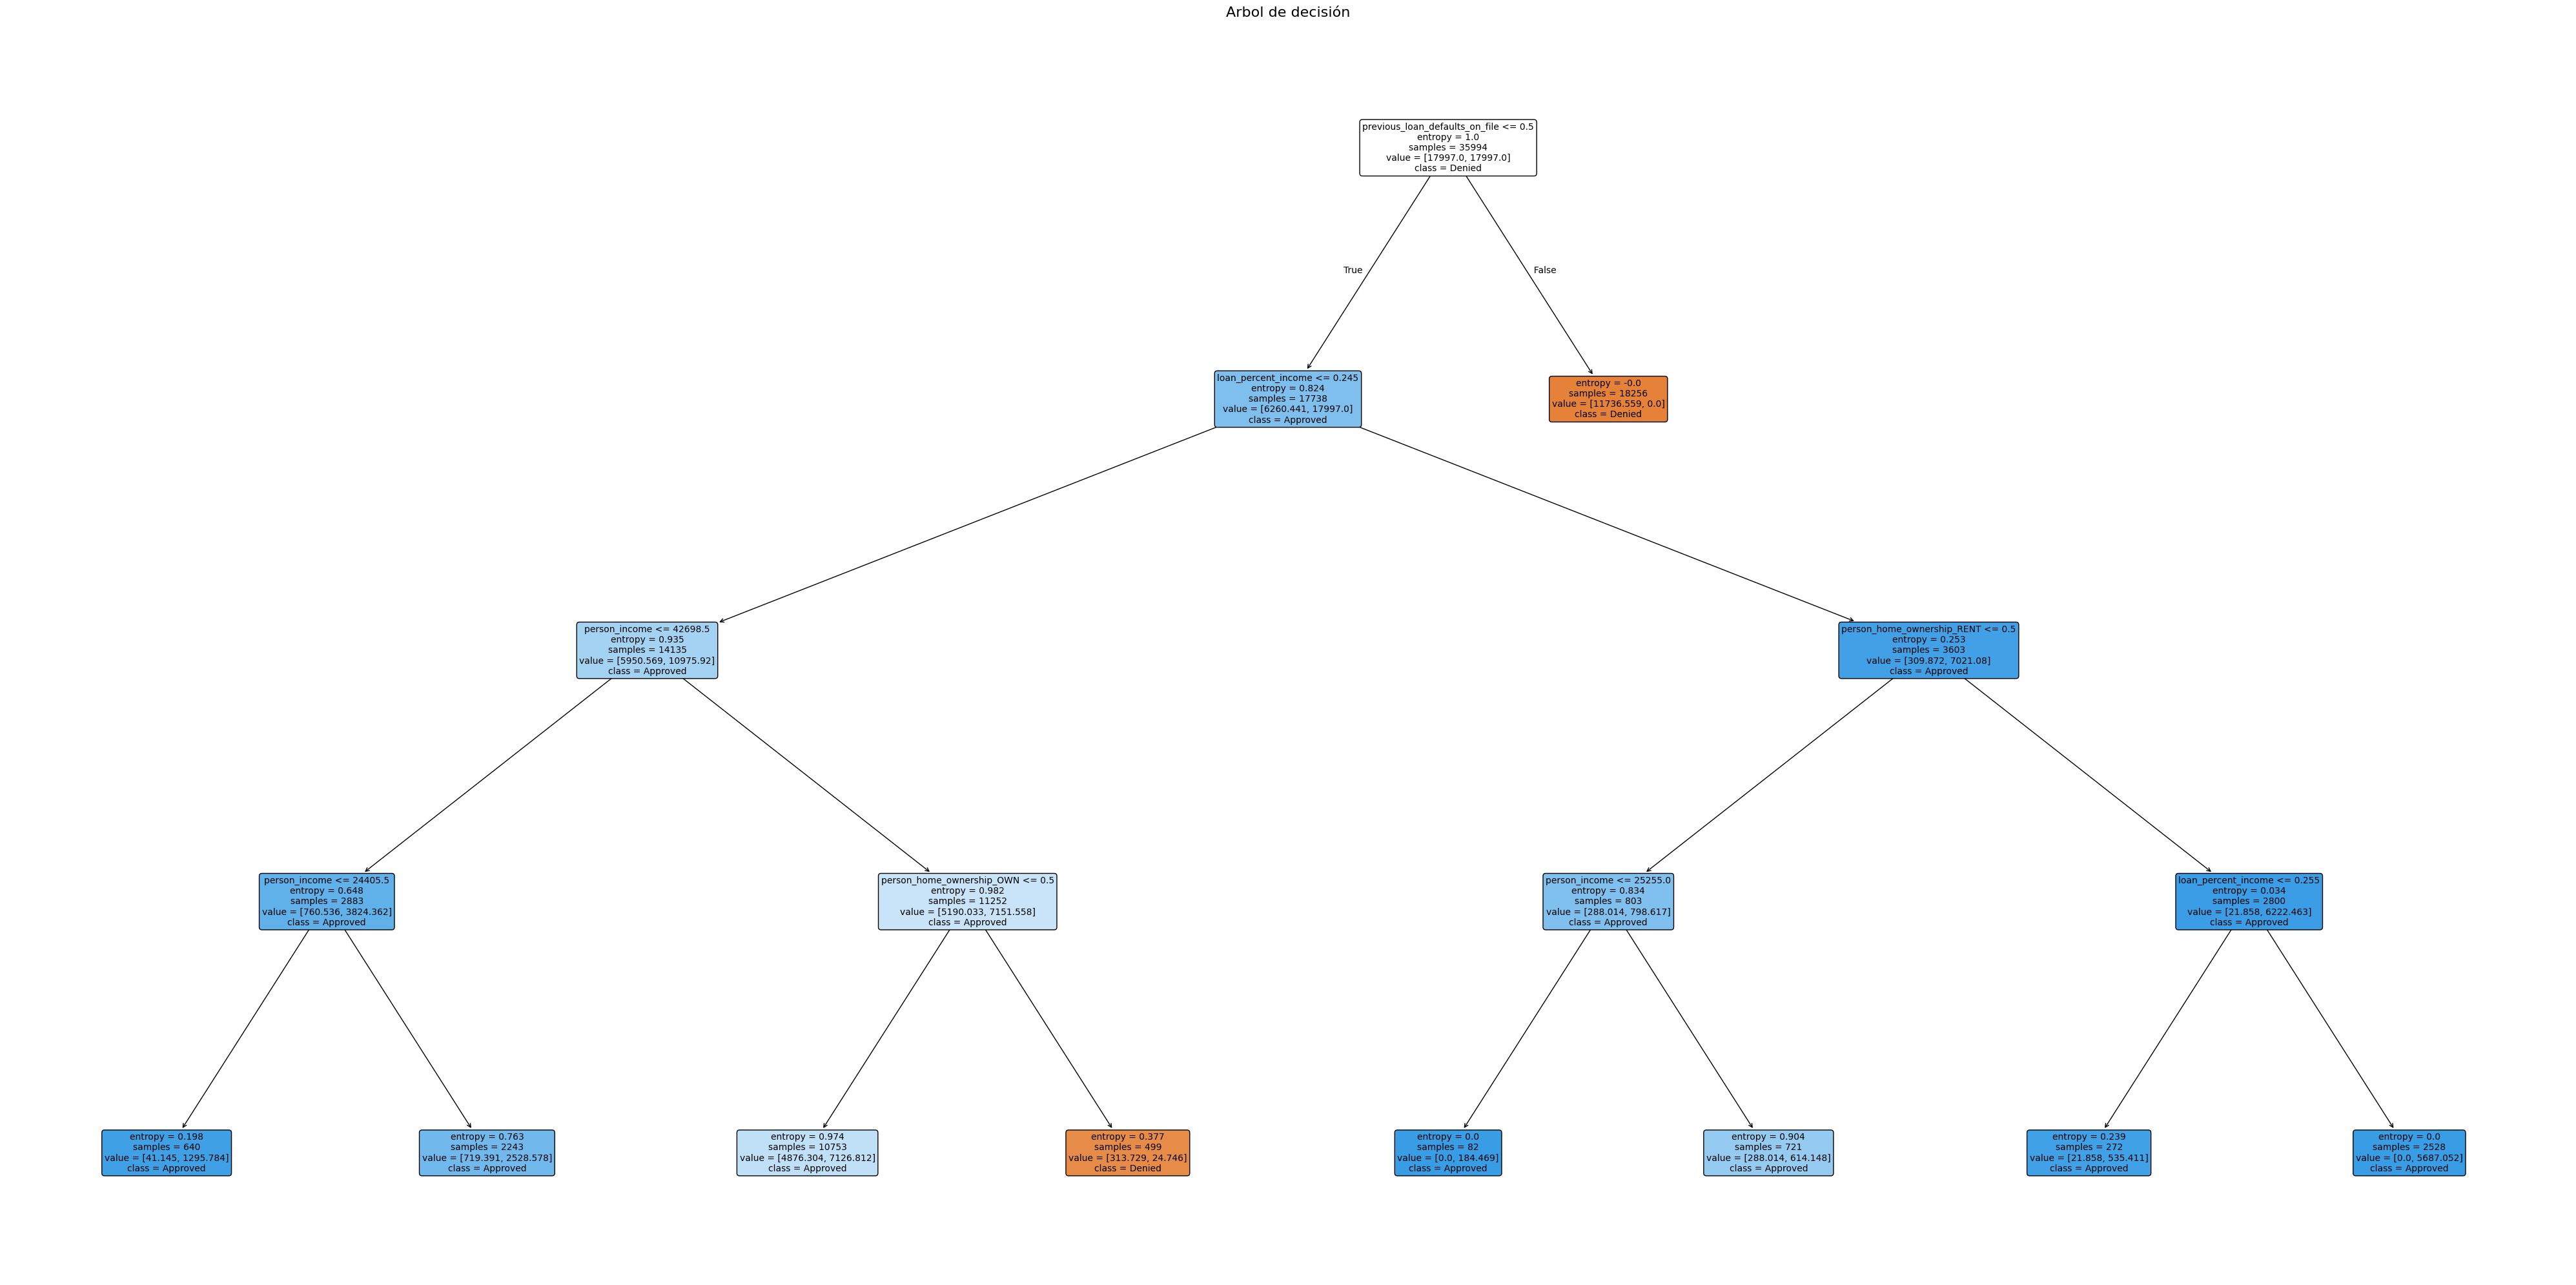

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(40, 20))  


plot_tree(
    best_tree,
    feature_names=X_train_dt.columns,
    class_names=['Denied', 'Approved'],
    filled=True,
    rounded=True,
    fontsize=10 
)

plt.title("Arbol de decisión", fontsize=16)
plt.tight_layout()
plt.show()